In [1]:
%load_ext autoreload
%autoreload 1
%aimport src
%aimport src.utils
%aimport src.SdmIsmAnalysis
%aimport src.SimpleSynthesis

# display last assigned variable automatically
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

%matplotlib inline
from matplotlib.pyplot import *

from src.utils import mygrid

import seaborn as sns
import polars as pl
import numpy as np
import scipy
from pathlib import Path

from src.SimpleSynthesis import SimpleSynthesis

import pyfar as pf

In [2]:
rooms = ["HL05W", "HL06W"]

listeners = [
    "0.0X_0.0Y",
    "3.0X_2.0Y",
    "1.75X_-2.0Y",
    "-1.75X_-3.0Y",  # lower right corner in floor plan
    "-1.25X_0.0Y",
]

sources = range(5)

a = (
    SimpleSynthesis()
)

main_path = Path("../data/processed/analysis_e10_full_run2")

WindowsPath('../data/processed/analysis_e10_full_run2')

In [3]:
arr = []
for room in rooms:
    for from_listener in listeners:
        for from_source in sources:
            from_name = f"{room}_{from_listener}_{from_source}SRC"
            from_path = main_path / from_name
            a.read_input_sofas(from_path)
            print(f"read input sofas in {from_path}")
            arr.append({
                "room": room,
                "from_listener": from_listener,
                "from_source": from_source,
                "ds_filter": a.filters[0]
            })

SOFA file contained custom entries
----------------------------------
GLOBAL_RoomDescription, GLOBAL_ReflectionHistories, PlaneNormals, PlaneDistances, SpeedOfSound
read input sofas in ..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_0SRC


C:\Users\jcmfs\Documents\MA\e4-vis-dataset\.venv\Lib\site-packages\pyfar\classes\coordinates.py:1050: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  warnings.warn((


SOFA file contained custom entries
----------------------------------
GLOBAL_RoomDescription, GLOBAL_ReflectionHistories, PlaneNormals, PlaneDistances, SpeedOfSound
read input sofas in ..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_1SRC
SOFA file contained custom entries
----------------------------------
GLOBAL_RoomDescription, GLOBAL_ReflectionHistories, PlaneNormals, PlaneDistances, SpeedOfSound
read input sofas in ..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_2SRC
SOFA file contained custom entries
----------------------------------
GLOBAL_RoomDescription, GLOBAL_ReflectionHistories, PlaneNormals, PlaneDistances, SpeedOfSound
read input sofas in ..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_3SRC
SOFA file contained custom entries
----------------------------------
GLOBAL_RoomDescription, GLOBAL_ReflectionHistories, PlaneNormals, PlaneDistances, SpeedOfSound
read input sofas in ..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_4SRC
SOFA file co

In [4]:
df = pl.DataFrame(arr)

room,from_listener,from_source,ds_filter
str,str,i64,object
"""HL05W""","""0.0X_0.0Y""",0,"time domain energy Signal: (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization"
"""HL05W""","""0.0X_0.0Y""",1,"time domain energy Signal: (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization"
"""HL05W""","""0.0X_0.0Y""",2,"time domain energy Signal: (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization"
"""HL05W""","""0.0X_0.0Y""",3,"time domain energy Signal: (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization"
"""HL05W""","""0.0X_0.0Y""",4,"time domain energy Signal: (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization"
…,…,…,…
"""HL06W""","""-1.25X_0.0Y""",0,"time domain energy Signal: (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization"
"""HL06W""","""-1.25X_0.0Y""",1,"time domain energy Signal: (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization"
"""HL06W""","""-1.25X_0.0Y""",2,"time domain energy Signal: (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization"


In [38]:
df.filter(
    pl.col("room").eq("HL05W")
).group_by("from_source").agg("from_listener", pl.col("ds_filter").agg_groups())

from_source,from_listener,ds_filter
i64,list[str],list[u32]
1,"[""0.0X_0.0Y"", ""3.0X_2.0Y"", … ""-1.25X_0.0Y""]","[1, 6, … 21]"
4,"[""0.0X_0.0Y"", ""3.0X_2.0Y"", … ""-1.25X_0.0Y""]","[4, 9, … 24]"
0,"[""0.0X_0.0Y"", ""3.0X_2.0Y"", … ""-1.25X_0.0Y""]","[0, 5, … 20]"
3,"[""0.0X_0.0Y"", ""3.0X_2.0Y"", … ""-1.25X_0.0Y""]","[3, 8, … 23]"
2,"[""0.0X_0.0Y"", ""3.0X_2.0Y"", … ""-1.25X_0.0Y""]","[2, 7, … 22]"


(-35.0, -5.0)

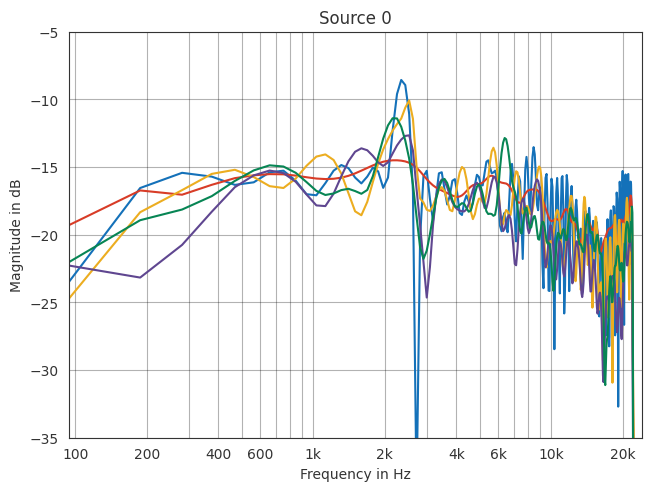

In [58]:
i = 0
ds_signals = df.filter(
    pl.col("room").eq("HL05W"),
    pl.col("from_source").eq(i)
)["ds_filter"].to_numpy()
for ds_signal in ds_signals:
    pf.plot.freq(ds_signal)
title(f"Source {i}")
ylim(-35, -5)

(-35.0, -5.0)

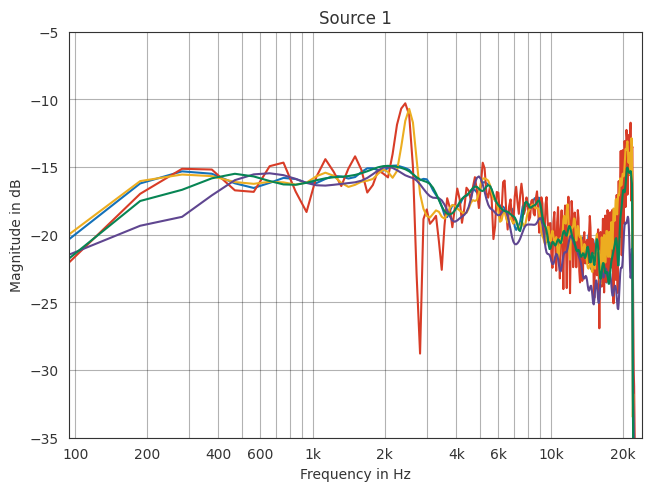

In [59]:
i = 1
ds_signals = df.filter(
    pl.col("room").eq("HL05W"),
    pl.col("from_source").eq(i)
)["ds_filter"].to_numpy()
for ds_signal in ds_signals:
    pf.plot.freq(ds_signal)
title(f"Source {i}")
ylim(-35, -5)

(-35.0, -5.0)

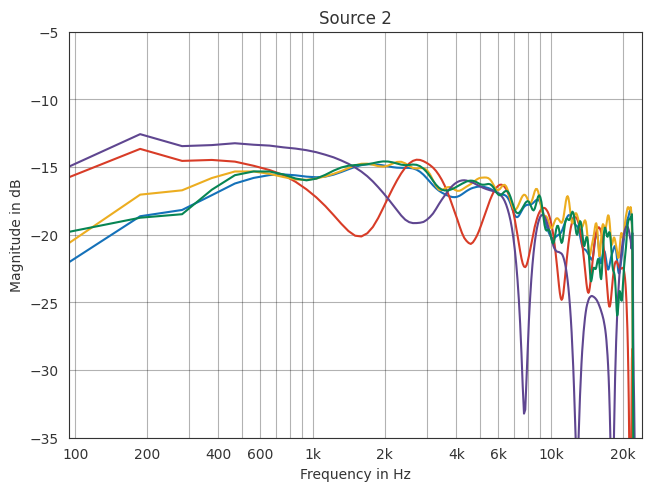

In [60]:
i = 2
ds_signals = df.filter(
    pl.col("room").eq("HL05W"),
    pl.col("from_source").eq(i)
)["ds_filter"].to_numpy()
for ds_signal in ds_signals:
    pf.plot.freq(ds_signal)
title(f"Source {i}")
ylim(-35, -5)

(-35.0, -5.0)

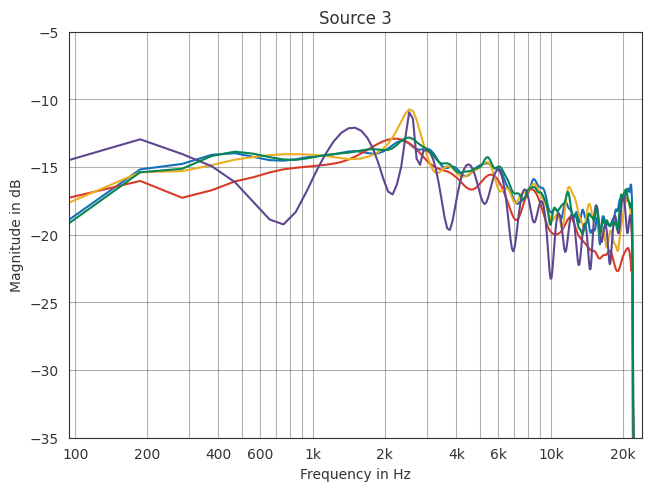

In [61]:
i = 3
ds_signals = df.filter(
    pl.col("room").eq("HL05W"),
    pl.col("from_source").eq(i)
)["ds_filter"].to_numpy()
for ds_signal in ds_signals:
    pf.plot.freq(ds_signal)
title(f"Source {i}")
ylim(-35, -5)

(-35.0, -5.0)

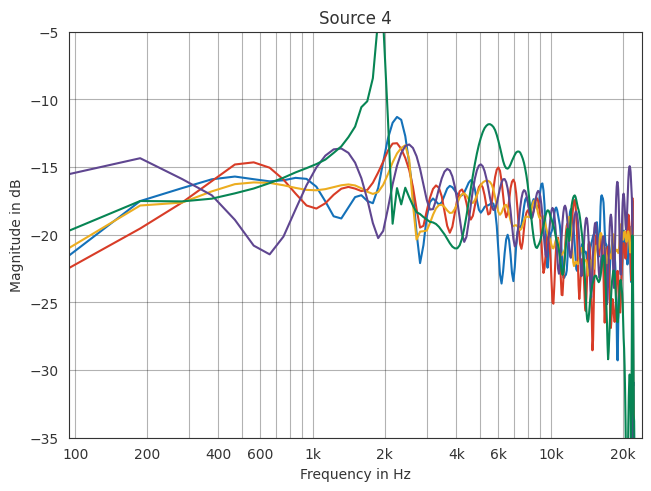

In [62]:
i = 4
ds_signals = df.filter(
    pl.col("room").eq("HL05W"),
    pl.col("from_source").eq(i)
)["ds_filter"].to_numpy()
for ds_signal in ds_signals:
    pf.plot.freq(ds_signal)
title(f"Source {i}")
ylim(-35, -5)

In [5]:
ds_signals = [df.filter(
    pl.col("room").eq("HL05W"),
    pl.col("from_source").eq(i)
)["ds_filter"].to_numpy() for i in range(5)]

[array([time domain energy Signal:
        (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization,
        time domain energy Signal:
        (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization,
        time domain energy Signal:
        (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization,
        time domain energy Signal:
        (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization,
        time domain energy Signal:
        (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization],
       dtype=object),
 array([time domain energy Signal:
        (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization,
        time domain energy Signal:
        (1,) channels with 512 samples @ 48000.0 Hz sampling rate and none FFT normalization,
        time domain energy Signal:
        (1,) channels with 512 samples 

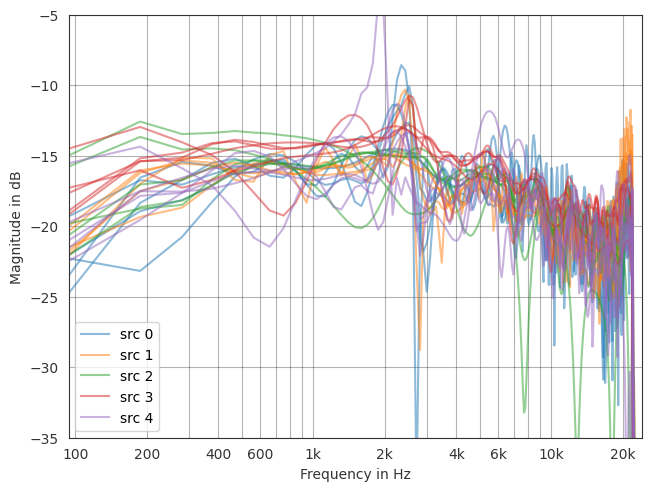

In [105]:
for i in range(5):
    label_set = False
    for ds in ds_signals[i]:
        if label_set is False:
            pf.plot.freq(ds, color=f"C{i}", alpha=.5, label=f"src {i}")
            label_set = True
        else:
            pf.plot.freq(ds, color=f"C{i}", alpha=.5)
ylim(-35, -5)
legend()

This is very chaotic. Probably bigger difference between individual measurements of the same speaker than between different speakers. Let's look at the averages of each speaker:

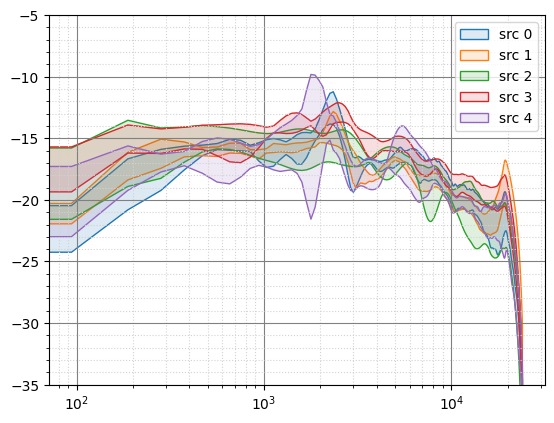

In [106]:
for i in range(5):
    label_set = False
    abs_arr = np.array([np.abs(pf.dsp.smooth_fractional_octave(ds, 3)[0].freq) for ds in ds_signals[i]])
    mean = np.mean(abs_arr, axis=0)
    std = np.std(abs_arr, axis=0)
    #plot(ds_signals[0][0].frequencies, 20*np.log10(mean).squeeze(), color=f"C{i}", alpha=.7, label=f"src {i}")
    fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), edgecolor=f"C{i}", facecolor=(f"C{i}",.15), label=f"src {i}")
ylim(-35, -5)
semilogx()
legend()
mygrid()

We see that the standard deviation ranges of 1/3-oct smoothed spectra only show pairwise non-overlapping between src 0 and src 3 below 200 Hz and between 1 kHz and 6 kHz. 

Overall however, the deviations between extractions from the same source are generally higher than the deviations from different sources. 

Let's check the result with min/max instead of std:

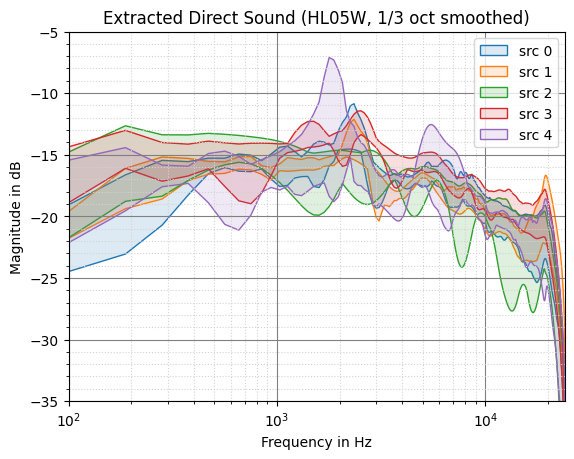

In [9]:
for i in range(5):
    label_set = False
    abs_arr = np.array([np.abs(pf.dsp.smooth_fractional_octave(ds, 3)[0].freq) for ds in ds_signals[i]])
    mi = np.min(abs_arr, axis=0)
    ma = np.max(abs_arr, axis=0)
    #plot(ds_signals[0][0].frequencies, 20*np.log10(mean).squeeze(), color=f"C{i}", alpha=.7, label=f"src {i}")
    fill_between(ds_signals[0][0].frequencies, 20*np.log10(mi).squeeze(), 20*np.log10(ma).squeeze(), edgecolor=f"C{i}", facecolor=(f"C{i}",.15), label=f"src {i}")
ylim(-35, -5)
semilogx()
legend()
mygrid()
xlim(100, 24e3)
xlabel("Frequency in Hz")
ylabel("Magnitude in dB")
title("Extracted Direct Sound (HL05W, 1/3 oct smoothed)")
savefig("../reports/figures/extracted_direct_sound.pdf")

There is a good amount of overlap between different sources. However, src 0 and src 3 again show to be non overlapping below 200 Hz. Also, there is some pairwise non-overlap in the region between 1 kHz and 4 kHz. 

Since this is around the Crossover of the speaker, I would hypothesize that this crossover sits at different frequencies for different speakers, resulting in different directivity around this region and consequently different extracted direct sound. 

## Some pairwise std comparisons

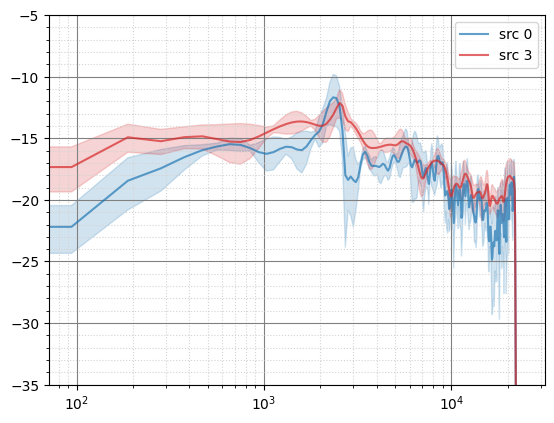

In [88]:
for i in [0,3]:
    label_set = False
    abs_arr = np.array([np.abs(ds.freq) for ds in ds_signals[i]])
    mean = np.mean(abs_arr, axis=0)
    std = np.std(abs_arr, axis=0)
    plot(ds_signals[0][0].frequencies, 20*np.log10(mean).squeeze(), color=f"C{i}", alpha=.7, label=f"src {i}")
    fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)
ylim(-35, -5)
semilogx()
legend()
mygrid()

C:\Users\jcmfs\AppData\Local\Temp\ipykernel_21428\1069971233.py:7: RuntimeWarning: invalid value encountered in log10
  fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)


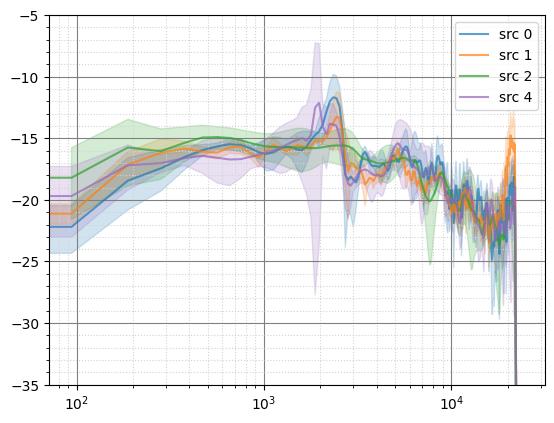

In [84]:
for i in [0,1,2,4]:
    label_set = False
    abs_arr = np.array([np.abs(ds.freq) for ds in ds_signals[i]])
    mean = np.mean(abs_arr, axis=0)
    std = np.std(abs_arr, axis=0)
    plot(ds_signals[0][0].frequencies, 20*np.log10(mean).squeeze(), color=f"C{i}", alpha=.7, label=f"src {i}")
    fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)
ylim(-35, -5)
semilogx()
legend()
mygrid()

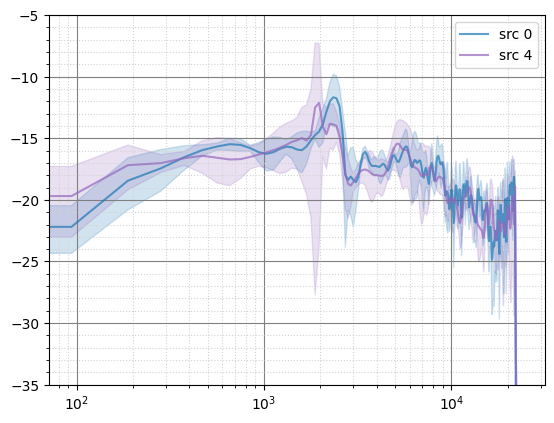

In [78]:
for i in [0,4]:
    label_set = False
    abs_arr = np.array([np.abs(ds.freq) for ds in ds_signals[i]])
    mean = np.mean(abs_arr, axis=0)
    std = np.std(abs_arr, axis=0)
    plot(ds_signals[0][0].frequencies, 20*np.log10(mean).squeeze(), color=f"C{i}", alpha=.7, label=f"src {i}")
    fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)
ylim(-35, -5)
semilogx()
legend()
mygrid()

C:\Users\jcmfs\AppData\Local\Temp\ipykernel_21428\731012653.py:7: RuntimeWarning: invalid value encountered in log10
  fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)


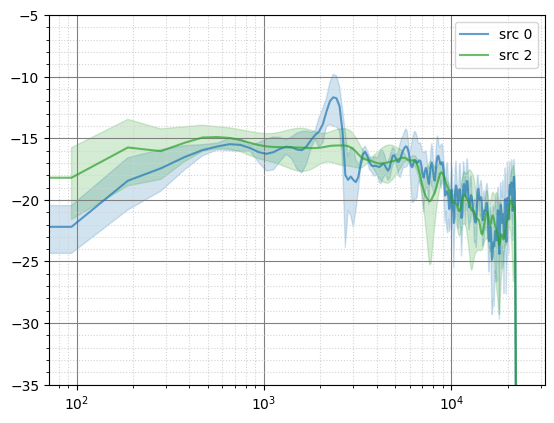

In [80]:
for i in [0,2]:
    label_set = False
    abs_arr = np.array([np.abs(ds.freq) for ds in ds_signals[i]])
    mean = np.mean(abs_arr, axis=0)
    std = np.std(abs_arr, axis=0)
    plot(ds_signals[0][0].frequencies, 20*np.log10(mean).squeeze(), color=f"C{i}", alpha=.7, label=f"src {i}")
    fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)
ylim(-35, -5)
semilogx()
legend()
mygrid()

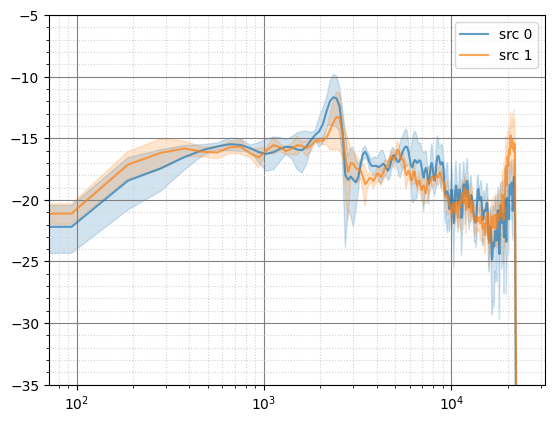

In [81]:
for i in [0,1]:
    label_set = False
    abs_arr = np.array([np.abs(ds.freq) for ds in ds_signals[i]])
    mean = np.mean(abs_arr, axis=0)
    std = np.std(abs_arr, axis=0)
    plot(ds_signals[0][0].frequencies, 20*np.log10(mean).squeeze(), color=f"C{i}", alpha=.7, label=f"src {i}")
    fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)
ylim(-35, -5)
semilogx()
legend()
mygrid()

C:\Users\jcmfs\AppData\Local\Temp\ipykernel_21428\402207452.py:7: RuntimeWarning: invalid value encountered in log10
  fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)


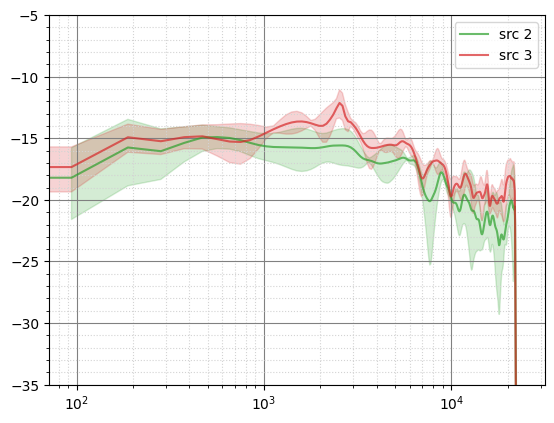

In [82]:
for i in [2,3]:
    label_set = False
    abs_arr = np.array([np.abs(ds.freq) for ds in ds_signals[i]])
    mean = np.mean(abs_arr, axis=0)
    std = np.std(abs_arr, axis=0)
    plot(ds_signals[0][0].frequencies, 20*np.log10(mean).squeeze(), color=f"C{i}", alpha=.7, label=f"src {i}")
    fill_between(ds_signals[0][0].frequencies, 20*np.log10(mean-std).squeeze(), 20*np.log10(mean+std).squeeze(), color=f"C{i}", alpha=.2)
ylim(-35, -5)
semilogx()
legend()
mygrid()

# For HL06W

Bigger deviations between same-source extractions are expected due to visibility of direct sound in room being less good. 

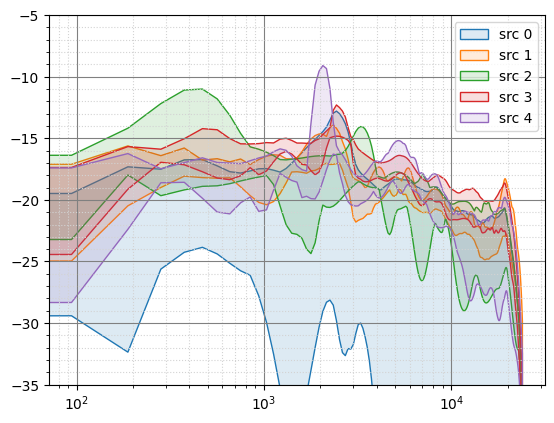

In [108]:
ds_signals6 = [df.filter(
    pl.col("room").eq("HL06W"),
    pl.col("from_source").eq(i)
)["ds_filter"].to_numpy() for i in range(5)]
for i in range(5):
    label_set = False
    abs_arr = np.array([np.abs(pf.dsp.smooth_fractional_octave(ds, 3)[0].freq) for ds in ds_signals6[i]])
    mi = np.min(abs_arr, axis=0)
    ma = np.max(abs_arr, axis=0)
    fill_between(ds_signals6[0][0].frequencies, 20*np.log10(mi).squeeze(), 20*np.log10(ma).squeeze(), edgecolor=f"C{i}", facecolor=(f"C{i}",.15), label=f"src {i}")
ylim(-35, -5)
semilogx()
legend()
mygrid()

As expected, there are large deviaations between the mostly overlapping source 1-3 and source 0, which sits directly in a corner, increasing its non-visibility to other positions. 